# 1. IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# LOAD THE DATASET

In [5]:
file_path = r"C:\Users\Hp\Downloads\dataset_2025-05-22T08_24_05.985495552Z_DEFAULT_INTEGRATION_IMF.RES_WEO_6.0.0.csv"
df = pd.read_csv(file_path)

# DESCRIBE THE DATASET

In [6]:
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              DATASET        SERIES_CODE OBS_MEASURE     COUNTRY  \
0  IMF.RES:WEO(6.0.0)  MNE.GGXWDN_NGDP.A   OBS_VALUE  Montenegro   
1  IMF.RES:WEO(6.0.0)           MAR.LE.A   OBS_VALUE     Morocco   
2  IMF.RES:WEO(6.0.0)  MAR.GGXWDG_NGDP.A   OBS_VALUE     Morocco   
3  IMF.RES:WEO(6.0.0)   MMR.NGAP_NPGDP.A   OBS_VALUE     Myanmar   
4  IMF.RES:WEO(6.0.0)         MNE.GGSB.A   OBS_VALUE  Montenegro   

                                           INDICATOR FREQUENCY     SCALE  \
0       Net debt, General government, Percent of GDP    Annual     Units   
1  Employed persons, Persons for countries / Inde...    Annual  Millions   
2     Gross debt, General government, Percent of GDP    Annual     Units   
3               Output gap, Percent of potential GDP    Annual     Units   
4  Structural balance, General government, Domest...    Annual  Billions   

   PRECISION  DECIMALS_DISPLAYED FUNCTIONAL_CAT  ...    2021    2022    2023  \
0        NaN                 NaN            NaN  ...  

# PREPROCESSING

In [29]:
# Step 3.1: Drop irrelevant columns
df_clean = df.drop(columns=['DATASET', 'OBS_MEASURE', 'SERIES_CODE'])

# Step 3.2: Filter to one economic indicator (example: gross government debt)
indicator_filter = 'Gross debt, General government, % of GDP'
df_filtered = df_clean[df_clean['INDICATOR'] == indicator_filter].copy()

# Step 3.3: Drop rows with missing values (for 2021–2025)
years = ['2018', '2019', '2020', '2021']
df_filtered = df_filtered.dropna(subset=years)

# Filter rows with complete data for only 2018 to 2021
df_filtered = df_clean[df_clean['INDICATOR'] == 'Gross debt, General government, % of GDP'].copy()
df_filtered.dropna(subset=['2018', '2019', '2020', '2021'], inplace=True)

# Then define X
X = df_filtered[['2018', '2019', '2020', '2021']]

# Step 3.4: Encode 'COUNTRY' as a categorical feature (label encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['COUNTRY_CODE'] = le.fit_transform(df_filtered['COUNTRY'])

# Step 3.5: Define features and target
X = df_filtered[years]
y = df_filtered['COUNTRY_CODE']  # We can later switch this to a category

# Preview
df_filtered.head()

# Step 3.1: Drop irrelevant columns
df_clean = df.drop(columns=['DATASET', 'OBS_MEASURE', 'SERIES_CODE'])

# Step 3.2: Filter for one indicator
indicator = 'Gross debt, General government, % of GDP'
df_filtered = df_clean[df_clean['INDICATOR'] == indicator].copy()

# Step 3.3: Keep only rows with complete data for 2021–2025
years = ['2018', '2019', '2020', '2021']
df_filtered = df_filtered.dropna(subset=years)

# Step 3.4: Create target column based on 2025 debt level
def classify_debt(val):
    if val > 80:
        return 'High'
    elif val >= 50:
        return 'Medium'
    else:
        return 'Low'

df_filtered['Debt_Level'] = df_filtered['2021'].apply(classify_debt)

# Step 3.5: Encode the target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['Debt_Label'] = le.fit_transform(df_filtered['Debt_Level'])

# Step 3.6: Define features (debt from 2021–2024) and target (Debt_Label)
X = df_filtered[['2018', '2019', '2020', '2021']]
y = df_filtered['Debt_Label']

# Preview final dataframe
df_filtered[['COUNTRY', '2018', '2019', '2020', '2021', 'Debt_Level', 'Debt_Label']].head()


,COUNTRY,2018,2019,2020,2021,Debt_Level,Debt_Label


# FEATURE SELECTION & EXTRACTION

In [16]:
# Step 3.1: Drop irrelevant columns
df_clean = df.drop(columns=['DATASET', 'OBS_MEASURE', 'SERIES_CODE'])

# Step 3.2: Filter for one indicator
indicator = 'Gross debt, General government, % of GDP'
df_filtered = df_clean[df_clean['INDICATOR'] == indicator].copy()

indicator = "Gross domestic product, current prices, U.S. dollars"
df_filtered = df_clean[df_clean['INDICATOR'] == indicator].copy()
df_filtered.dropna(subset=['2018', '2019', '2020', '2021'], inplace=True)


# Step 3.3: Keep only rows with complete data for 2021–2025
years = ['2018', '2019', '2020', '2021']
df_filtered = df_filtered.dropna(subset=years)

# Step 3.4: Create target column based on 2025 debt level
def classify_debt(val):
    if val > 80:
        return 'High'
    elif val >= 50:
        return 'Medium'
    else:
        return 'Low'

df_filtered['Debt_Level'] = df_filtered['2025'].apply(classify_debt)

# Step 3.5: Encode the target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['Debt_Label'] = le.fit_transform(df_filtered['Debt_Level'])

# Step 3.6: Define features (debt from 2021–2024) and target (Debt_Label)
X = df_filtered[['2018', '2019', '2020', '2021']]
y = df_filtered['Debt_Label']

# Preview final dataframe
df_filtered[['COUNTRY', '2018', '2019', '2020', '2021', 'Debt_Level', 'Debt_Label']].head()


,COUNTRY,2018,2019,2020,2021,Debt_Level,Debt_Label


In [15]:
years = ['2018', '2019', '2020', '2021']
df_clean[years].notnull().groupby(df_clean['INDICATOR']).sum().assign(Total=lambda x: x.sum(axis=1)).sort_values('Total', ascending=False).head(10)


,2018,2019,2020,2021,Total
INDICATOR,,,,,
"All Items, Consumer price index (CPI), End-of-period (EoP), percent change",208,208,207,207,830
"All Items, Consumer price index (CPI), Period average, percent change",208,208,207,207,830
"Gross domestic product (GDP), Current prices, US dollar",208,208,207,207,830
"Gross domestic product (GDP), Constant prices, Percent change",208,208,207,207,830
"Expenditure, General government, Percent of GDP",207,207,206,206,826
"Gross domestic product (GDP), Current prices, Purchasing power parity (PPP) international dollar, ICP benchmarks 2017-2021",207,207,206,206,826
"Revenue, General government, Percent of GDP",207,207,206,206,826
"Net lending (+) / net borrowing (-), General government, Percent of GDP",207,207,206,206,826
"Current account balance (credit less debit), US dollar",206,207,206,206,825


# NORMALIZATION

In [33]:
 
df_clean = df.copy()
df_clean.dropna(axis=1, how='all', inplace=True)
df_clean.dropna(subset=['COUNTRY', 'INDICATOR'], inplace=True)

# Convert year columns to numeric
year_columns = [col for col in df_clean.columns if col.isdigit()]
df_clean[year_columns] = df_clean[year_columns].apply(pd.to_numeric, errors='coerce')
df_clean.dropna(subset=year_columns, how='all', inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# Step 3.1: Drop irrelevant columns
df_step = df_clean.drop(columns=['DATASET', 'OBS_MEASURE', 'SERIES_CODE'], errors='ignore')

# Step 3.2: Filter to one economic indicator
indicator_filter = 'Gross debt, General government, Percent of GDP'
df_filtered = df_step[df_step['INDICATOR'] == indicator_filter].copy()

# Step 3.3: Filter rows with complete data for 2018 to 2021
years = ['2018', '2019', '2020', '2021']
df_filtered.dropna(subset=years, inplace=True)

# Step 3.4: Encode 'COUNTRY' as a categorical feature
le = LabelEncoder()
df_filtered['COUNTRY_CODE'] = le.fit_transform(df_filtered['COUNTRY'])

# Step 3.5: Define features and target
X = df_filtered[years]
y = df_filtered['COUNTRY_CODE']

# Output the shape of the data and missing value summary
(filtered_shape, X_shape, missing_values_summary) = (df_filtered.shape, X.shape, df_filtered[years].isnull().sum())
(filtered_shape, X_shape, missing_values_summary)



((204, 93),
 (204, 4),
 2018    0
 2019    0
 2020    0
 2021    0
 dtype: int64)

# DATA VISUALIZATION

C:\Users\Hp\AppData\Local\Temp\ipykernel_16200\518883978.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_long, x="Year", y="Gross_Debt_Percent_GDP", estimator='mean', ci=None, marker='o')


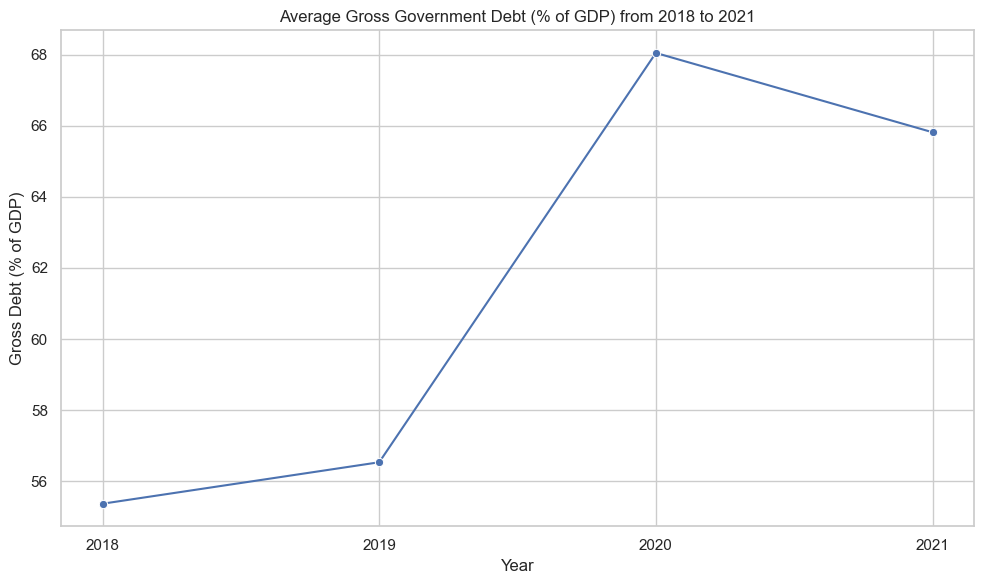

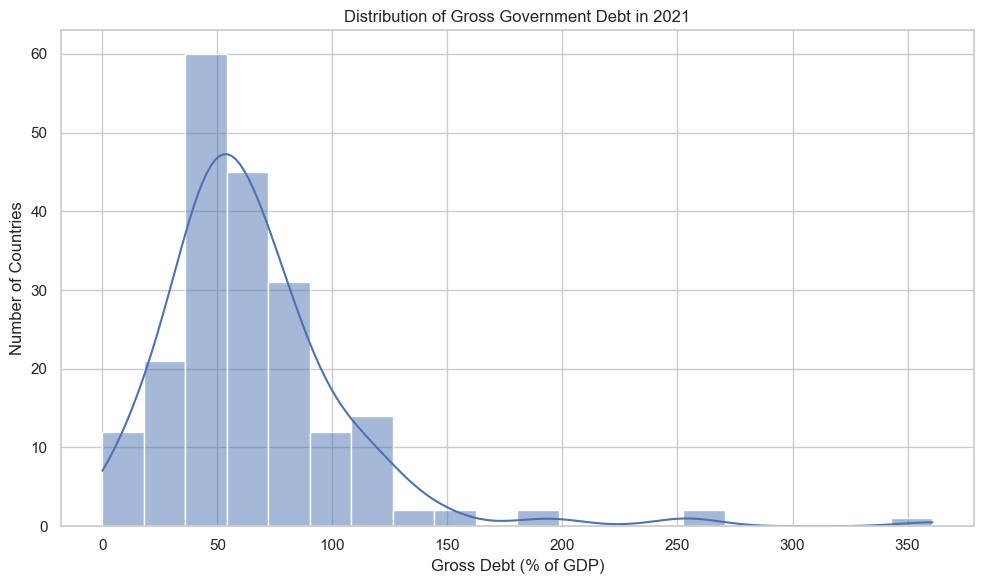

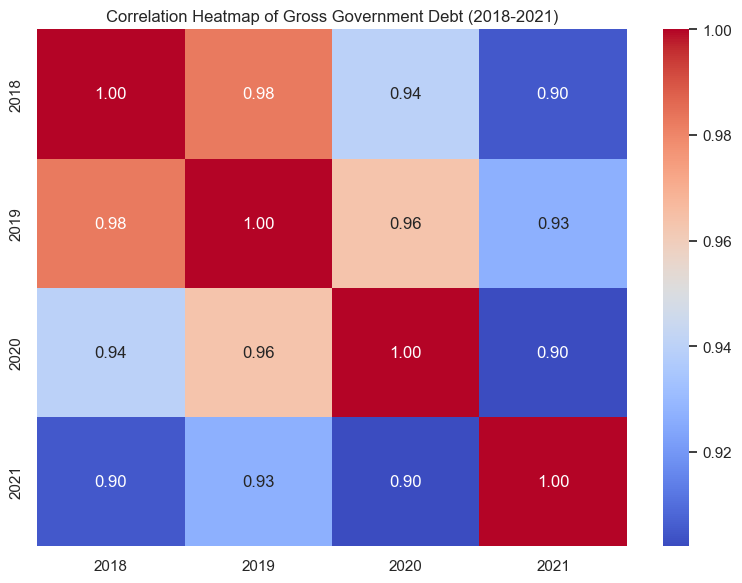

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Convert the data from wide to long format for easier plotting
df_long = df_filtered.melt(id_vars=["COUNTRY", "COUNTRY_CODE"], value_vars=years,
                           var_name="Year", value_name="Gross_Debt_Percent_GDP")

# Plot 1: Average Gross Debt over time across all countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Year", y="Gross_Debt_Percent_GDP", estimator='mean', ci=None, marker='o')
plt.title("Average Gross Government Debt (% of GDP) from 2018 to 2021")
plt.ylabel("Gross Debt (% of GDP)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of debt in a single year (2021)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['2021'], bins=20, kde=True)
plt.title("Distribution of Gross Government Debt in 2021")
plt.xlabel("Gross Debt (% of GDP)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

# Plot 3: Heatmap of correlation between years
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtered[years].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Gross Government Debt (2018-2021)")
plt.tight_layout()
plt.show()


# TRAININ, TESTNG

In [40]:
from sklearn.model_selection import train_test_split

X = df_filtered[['2018', '2019', '2020', '2021']]
y = df_filtered['COUNTRY_CODE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # No stratify
)





In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Preview the data with clusters
df_filtered[['COUNTRY', '2018', '2019', '2020', '2021', 'Cluster']].head()


,COUNTRY,2018,2019,2020,2021,Cluster
0,Morocco,60.458,60.270,72.245,69.351,1
6,"Mauritania, Islamic Republic of",59.182,57.687,56.489,54.450,1
10,Sri Lanka,83.585,82.594,96.881,102.669,2
32,Advanced Economies,102.525,103.593,121.963,115.497,2
48,Panama,35.593,39.863,61.493,54.404,1


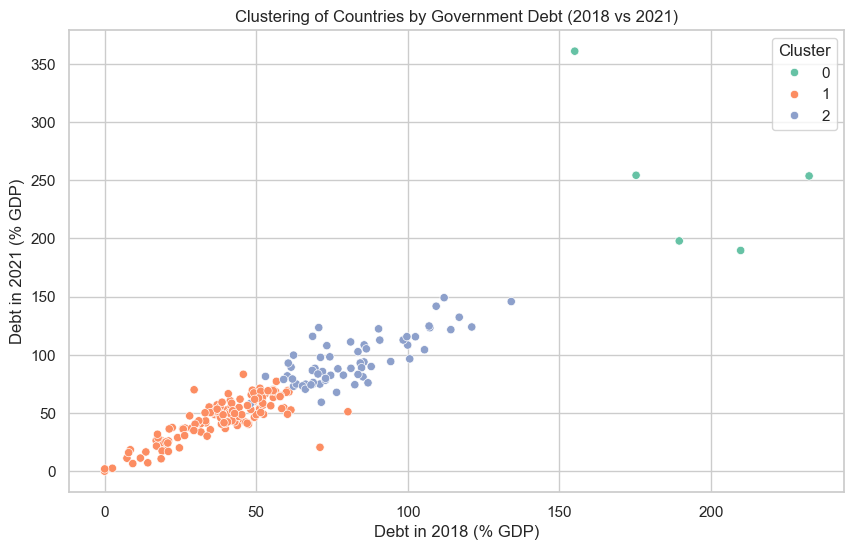

                            COUNTRY  Cluster
0                           Morocco        1
6   Mauritania, Islamic Republic of        1
10                        Sri Lanka        2
32               Advanced Economies        2
48                           Panama        1
51                         Paraguay        1
52                             Oman        1
58                      Philippines        1
72                          Romania        1
74               Russian Federation        1


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='2018', y='2021', hue='Cluster', palette='Set2')
plt.title('Clustering of Countries by Government Debt (2018 vs 2021)')
plt.xlabel('Debt in 2018 (% GDP)')
plt.ylabel('Debt in 2021 (% GDP)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optional: View sample results
print(df_filtered[['COUNTRY', 'Cluster']].head(10))


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Create a new label column based on average debt
df_filtered['avg_debt'] = df_filtered[['2018', '2019', '2020', '2021']].mean(axis=1)

# Bin into 3 classes: Low (0), Medium (1), High (2)
df_filtered['debt_level'] = pd.qcut(df_filtered['avg_debt'], q=3, labels=[0, 1, 2])

# Step 2: Define features and target
X = df_filtered[['2018', '2019', '2020', '2021']]
y = df_filtered['debt_level']

# Step 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train[:5], y_train[:5]


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Compute average debt from 2018–2021
df_filtered['avg_debt'] = df_filtered[['2018', '2019', '2020', '2021']].mean(axis=1)

# Bin into 3 levels: Low, Medium, High
df_filtered['debt_level'] = pd.qcut(df_filtered['avg_debt'], q=3, labels=[0, 1, 2])

# Features and target
X = df_filtered[['2018', '2019', '2020', '2021']]
y = df_filtered['debt_level']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("Decision Tree:\n", classification_report(y_test, tree.predict(X_test)))

# 2. Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
print("SVM:\n", classification_report(y_test, svm.predict(X_test)))

# 3. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, logreg.predict(X_test)))


Decision Tree:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.79      0.88        14
           2       0.93      1.00      0.97        14

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.92        41
weighted avg       0.93      0.93      0.92        41

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.

# DECISION BOUNDARY VISUALIZATION

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.83      0.92      0.87        26
           2       1.00      1.00      1.00        15

    accuracy                           0.89        62
   macro avg       0.91      0.89      0.90        62
weighted avg       0.89      0.89      0.89        62



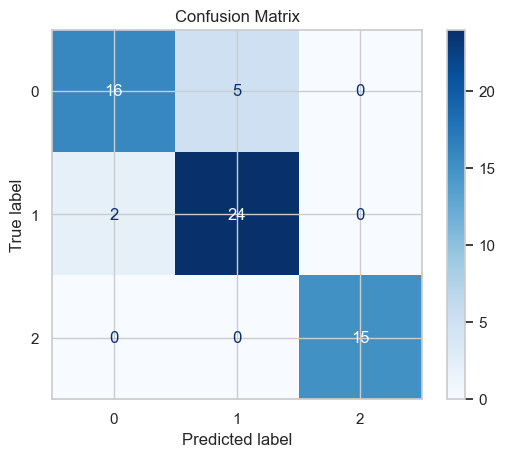

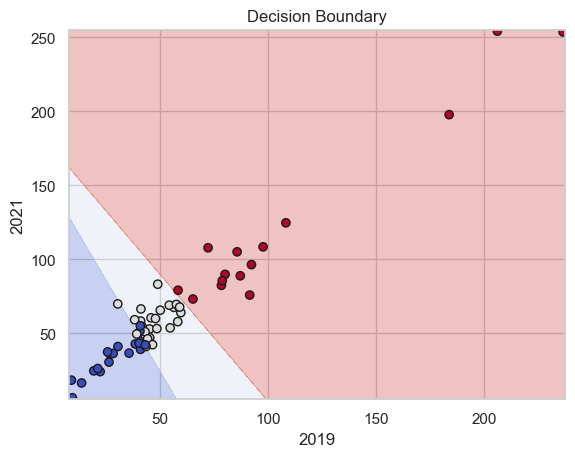

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Select 2 features for visualization
X = df_filtered[['2019', '2021']].values
y = df_filtered['debt_level'].values  # replace 'Label' with your target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualizing decision boundary (2D only)
def plot_decision_boundary(X, y, model):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    plt.xlabel('2019')
    plt.ylabel('2021')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.83      0.92      0.87        26
           2       1.00      1.00      1.00        15

    accuracy                           0.89        62
   macro avg       0.91      0.89      0.90        62
weighted avg       0.89      0.89      0.89        62



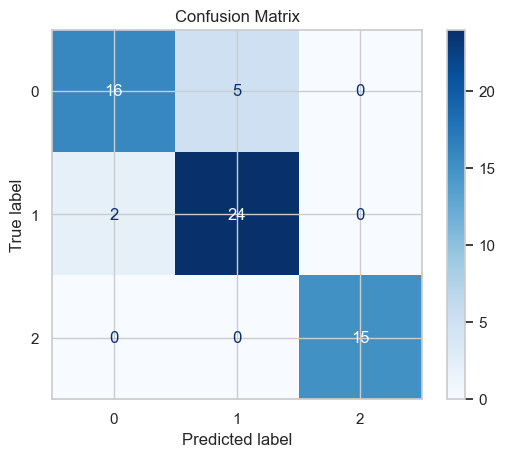

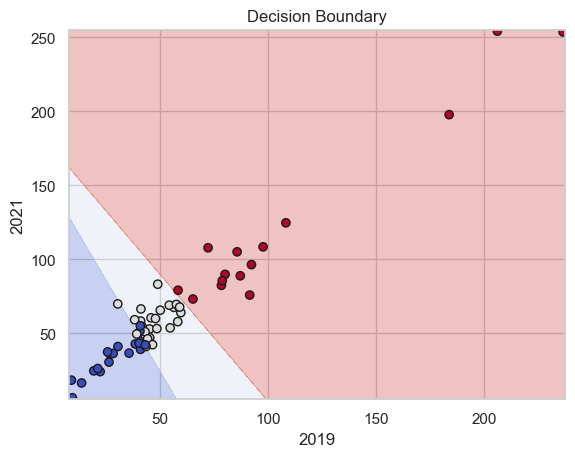

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Select 2 features for visualization
X = df_filtered[['2019', '2021']].values
y = df_filtered['debt_level'].values  # replace 'Label' with your target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualizing decision boundary (2D only)
def plot_decision_boundary(X, y, model):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    plt.xlabel('2019')
    plt.ylabel('2021')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.83      0.92      0.87        26
           2       1.00      1.00      1.00        15

    accuracy                           0.89        62
   macro avg       0.91      0.89      0.90        62
weighted avg       0.89      0.89      0.89        62



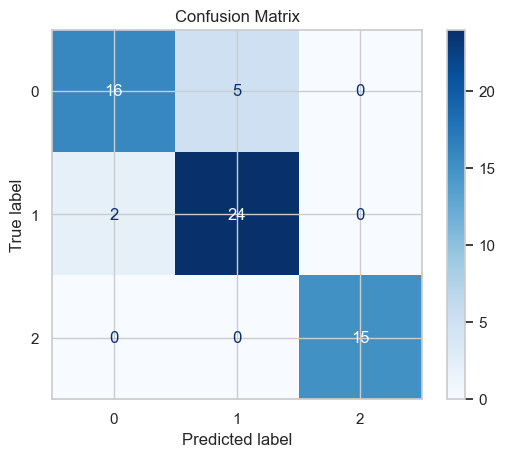

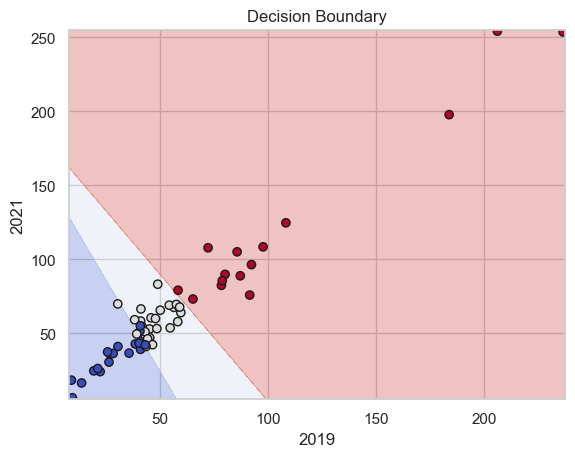

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Select 2 features for visualization
X = df_filtered[['2019', '2021']].values
y = df_filtered['debt_level'].values  # replace 'Label' with your target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualizing decision boundary (2D only)
def plot_decision_boundary(X, y, model):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    plt.xlabel('2019')
    plt.ylabel('2021')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model)


# COMPARATIVE ANALYSIS OF CLASSIFIERS

In [56]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })


In [57]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.919355   0.919534  0.919355  0.919132
1                  KNN  0.887097   0.886169  0.887097  0.886250
2  Logistic Regression  0.887097   0.890063  0.887097  0.885834
3        Decision Tree  0.870968   0.876281  0.870968  0.868785


# VISUALIZED MODEL COMPARISON

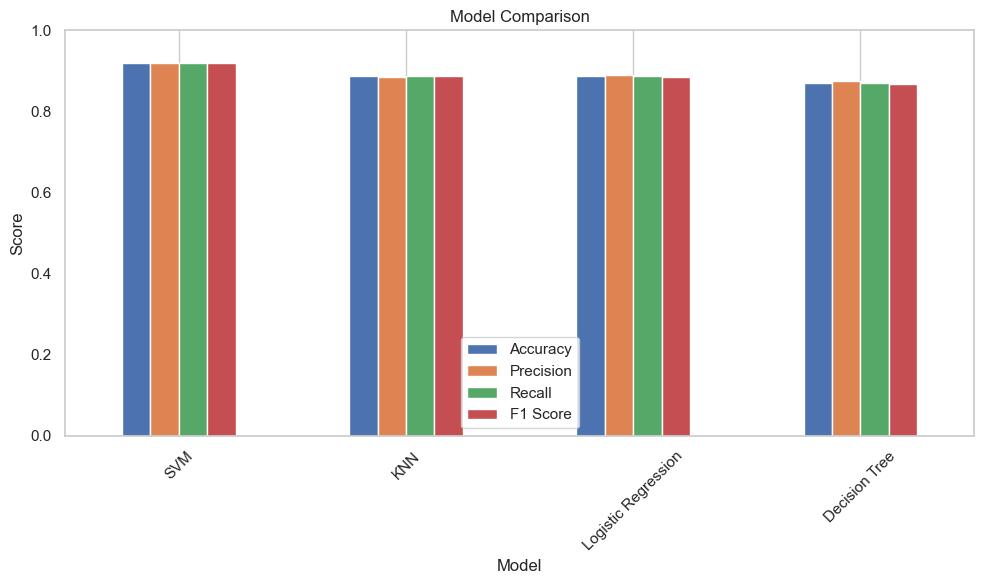

In [58]:
import matplotlib.pyplot as plt

results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# CROSS VALIDATION

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

models = {
   'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', C=1.0),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


KNN Cross-Validation Accuracy: 0.965 ± 0.023
Decision Tree Cross-Validation Accuracy: 0.922 ± 0.057
SVM Cross-Validation Accuracy: 0.957 ± 0.042
Logistic Regression Cross-Validation Accuracy: 0.965 ± 0.032
